In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers 

In [17]:
df = pd.read_csv('Classify-2DwLabels-1.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.22,0.59,-1
1,-0.35,0.12,-1
2,0.36,0.80,1
3,-0.34,0.10,-1
4,0.44,0.77,1


In [18]:

train_size = int(0.8 * len(df))

train_set = df[:train_size]
test_set = df[train_size:]

In [19]:
train_set.head()

,Col1,Col2,Class
0,-0.22,0.59,-1
1,-0.35,0.12,-1
2,0.36,0.80,1
3,-0.34,0.10,-1
4,0.44,0.77,1


In [20]:
test_set.head()

,Col1,Col2,Class
200,0.39,-0.93,1
201,0.80,0.59,1
202,-0.12,-0.62,1
203,0.94,-0.15,1
204,0.24,0.20,1


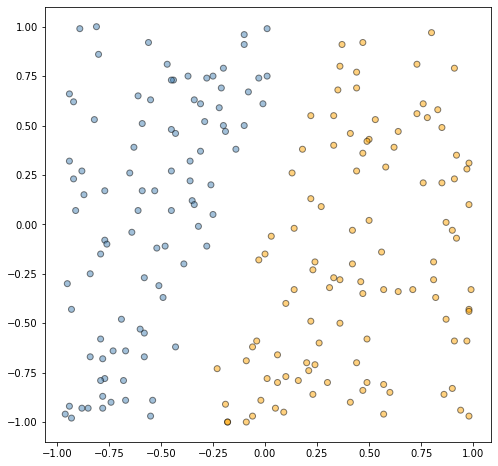

In [21]:
X_train = train_set[["Col1", "Col2"]].to_numpy()
y_train = train_set[["Class"]].to_numpy()
X_test = test_set[["Col1", "Col2"]].to_numpy()
y_test = test_set[["Class"]].to_numpy()
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.show()

In [22]:
n_samples, n_features = X_train.shape
K = np.dot(X_train, X_train.T)

In [23]:
np.dot(X_train, X_train.T)

array([[ 0.3965,  0.1478,  0.3928, ..., -0.0433, -0.4125, -0.4746],
       [ 0.1478,  0.1369, -0.03  , ..., -0.2408, -0.3861, -0.3621],
       [ 0.3928, -0.03  ,  0.7696, ...,  0.4416,  0.0924, -0.0708],
       ...,
       [-0.0433, -0.2408,  0.4416, ...,  0.6217,  0.6831,  0.5604],
       [-0.4125, -0.3861,  0.0924, ...,  0.6831,  1.089 ,  1.0197],
       [-0.4746, -0.3621, -0.0708, ...,  0.5604,  1.0197,  0.9873]])

In [24]:
n = X_train.shape[0]
H = np.dot(y_train*X_train, (y_train*X_train).T)
q = np.repeat([-1.0], n)[..., None]
A = y_train.reshape(1, -1)
b = 0.0
G = np.negative(np.eye(n))
h = np.zeros(n)
A = A.astype('float')

In [25]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [26]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -4.4903e+01 -9.2502e+01  7e+02  3e+01  2e+00
 1: -7.2764e+01 -6.1733e+01  2e+02  8e+00  6e-01
 2: -8.1721e+01 -5.8792e+01  1e+02  4e+00  3e-01
 3: -4.5857e+01 -4.3551e+01  4e+01  8e-01  6e-02
 4: -3.9651e+01 -3.9603e+01  2e+00  3e-02  2e-03
 5: -3.9375e+01 -3.9573e+01  4e-01  4e-03  3e-04
 6: -3.9552e+01 -3.9554e+01  4e-03  4e-05  3e-06
 7: -3.9554e+01 -3.9554e+01  4e-05  4e-07  3e-08
 8: -3.9554e+01 -3.9554e+01  4e-07  4e-09  3e-10
Optimal solution found.


In [27]:
w = np.dot((y_train * alphas).T, X_train)[0]

In [28]:
S = (alphas > 1e-5).flatten()
print(S)
b = np.mean(y_train[S] - np.dot(X_train[S], w.reshape(-1,1)))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [29]:
print("W:", w)
print("b:", b)

W: [ 8.41346154 -2.88461538]
b: 0.8293269229213843


[-2.62916667 -2.51011905 -2.39107143 -2.27202381 -2.15297619 -2.03392857
 -1.91488095 -1.79583333 -1.67678571 -1.5577381  -1.43869048 -1.31964286
 -1.20059524 -1.08154762 -0.9625     -0.84345238 -0.72440476 -0.60535714
 -0.48630952 -0.3672619  -0.24821429 -0.12916667 -0.01011905  0.10892857
  0.22797619  0.34702381  0.46607143  0.58511905  0.70416667  0.82321429
  0.9422619   1.06130952  1.18035714  1.29940476  1.41845238  1.5375
  1.65654762  1.77559524  1.89464286  2.01369048  2.1327381   2.25178571
  2.37083333  2.48988095  2.60892857  2.72797619  2.84702381  2.96607143
  3.08511905  3.20416667]


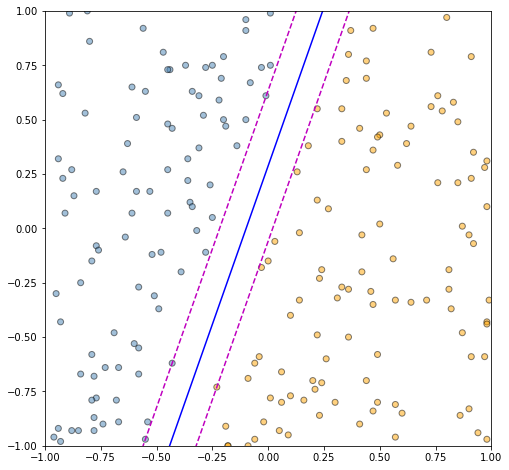

In [30]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
print(yy)
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

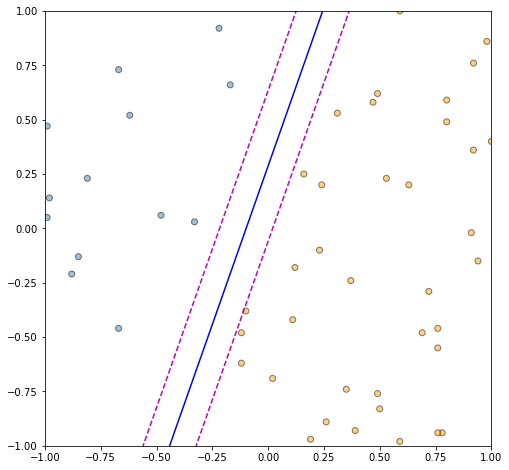

In [31]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [32]:
#x values on graph
xx = X_test[:,0]
a = -w[0]/w[1]
#y values on graph from x values that correspond w hyperplane
yy = a*xx - (b)/w[1]


In [33]:
y_pred = np.zeros(50)
# y predicted is 1 if the y values on the graph are below the hyperplane
# y predicted is -1 if the y values on the graph are above the hyperplane
for x in range(X_test.shape[0]):
    if X_test[x,1] <= yy[x]:
        y_pred[x] = 1
    if X_test[x,1] >= yy[x]:
        y_pred[x] = -1
y_pred = y_pred.astype(int)

In [34]:
loss = 0
# add to loss if predicted y values do not match validation y
for x in range(X_test.shape[0]):
    if y_pred[x] != y_test[x,0]:
        loss += 1


In [35]:
print("The empirical validation loss is:", loss)

The empirical validation loss is: 0


In [36]:
print("The hyperplane is y=", (-w[0]/w[1]),"x +",-b/w[1])

The hyperplane is y= 2.916666666565038 x + 0.2874999999553028


In [37]:
print("The margin is: ", margin)

The margin is:  0.11243243243954476
